### To start with, I'll be downloading the inauguration speeches from both Lula and Bolsonaro using pytube:

In [768]:
#First I'll download the audios for the transcripts
from pytube import YouTube
from pytube.cli import on_progress
import os

#Adding the file with the URL of the videos I'll require for this project
TXT = input("Add the filename of the URLs (include the .txt at the end): ") #urls.txt
TXT = str(TXT)

#looping in the lines of the file
file = open(TXT, 'r')

#looping
for line in file :
    
    URL = line
    
    try:        
        #Using Youtube from pytube to get only the audio
        youtube = YouTube(URL)

        audio = youtube.streams.get_audio_only()
        
        #file name
        filename = input("Add the name of the file: (Title: " + str(audio.title) + ")") 
        filename = str(filename)+'.mp4'
        


        #Defining the title of the audio, to make sure which one was downloaded successfully 
        title_msg = '\n' + 'Title: ' + str(audio.title) + '\n'
        file_name = '\n' + 'Filename: ' + filename + '\n'

        #Downloading
        audio.download()
        
        #
        print('\n'+ "Download Complete " +'\n' , title_msg, file_name)
        
    except:
        pass
        

        
        file.close()

Add the filename of the URLs (include the .txt at the end): urls.txt
Add the name of the file: (Title: NA ÍNTEGRA: Bolsonaro faz discurso à nação)Bolsonaro

Download Complete 
 
Title: NA ÍNTEGRA: Bolsonaro faz discurso à nação
 
Filename: Bolsonaro.mp4

Add the name of the file: (Title: A íntegra do discurso de Lula diante do Planalto)Lula

Download Complete 
 
Title: A íntegra do discurso de Lula diante do Planalto
 
Filename: Lula.mp4



### Now that we downloaded both of our files, let's start with the transcript of it. 

In [56]:
import whisper
import ffmpeg

#To make sure we are transcribing it properly, I set the language to Portuguese and used the large model
model = whisper.load_model('large')

#Selecting the file names
audio_name = input('Add the audio filename for the 1st transcription: ') #Bolsonaro
audio_name2 = input('Add the audio filename for the 2nd transcription: ') #Lula

#Defining the output 1: Bolsonaro

audio_file = str(audio_name)+'.mp4'
audio_transcript = str(audio_name) +'.txt'

#Transcribing it to Portuguese
output1 = model.transcribe(audio_file, fp16= False, language = "Portuguese")['text']

#Adding to the file name
with open(audio_transcript, 'w') as f:
    f.write(output1)
    
#Same as above
#Defining the output 2: Lula
        
audio_file2 = str(audio_name2)+'.mp4'
audio_transcript2 = str(audio_name2) +'.txt'


output2 = model.transcribe(audio_file2, fp16= False, language = "Portuguese")['text']

with open(audio_transcript2, 'w') as f:
    f.write(output2)
    
print("Transcriptions complete")

Add the audio filename for the transcription: Lula
Transcriptions complete


### The files are finally available. Let's start analysing them.

Lula's speech: 
Raw: <FreqDist with 1136 samples and 3281 outcomes>
Filtered: <FreqDist with 987 samples and 1601 outcomes>
Most common words: [('país', 30), ('todos', 22), ('brasil', 22), ('povo', 20), ('desigualdade', 20), ('brasileiro', 15), ('anos', 13), ('cada', 11), ('tempo', 10), ('brasileiros', 10), ('fome', 10), ('brasileiras', 9), ('deste', 8), ('todas', 8), ('governo', 8)]


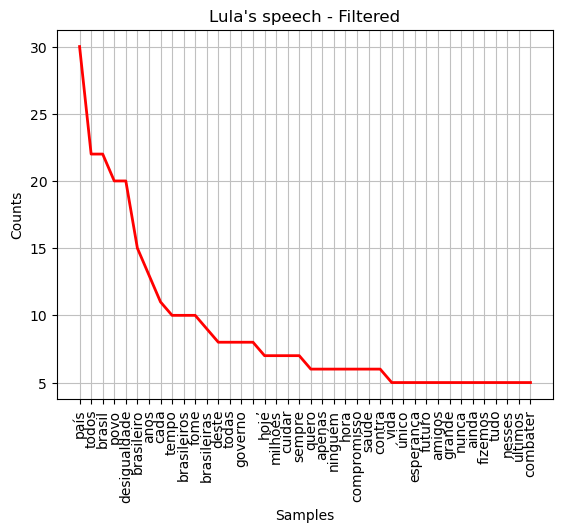

In [679]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import pandas as pd

#nltk.download('punkt')

#Lula
with open('Lula.txt') as text1:
    words1 = word_tokenize(text1.read(),  language='Portuguese', preserve_line = False)
    
    lower_words1 = (map(lambda x: x.lower(), words1))
    
#cleaning the words
stop_words = set(stopwords.words("portuguese"))

#removing stopwords
filtered_words1 = []
for w in lower_words1: 
    if w not in stop_words:
        filtered_words1.append(w)
        
#removing other items
for item in filtered_words1:
    if item == " ": filtered_words1.remove(item)
    if item == ",": filtered_words1.remove(item)
    if item == ".": filtered_words1.remove(item)
    if item == "E": filtered_words1.remove(item)

#Frequency
fdist1 = FreqDist(words1)
fdist1_filtered = FreqDist(filtered_words1)

#Lenght and the 10 most common words
print("Lula's speech: "
        +'\n' + 'Raw: '+ str(fdist1)
        +'\n' + 'Filtered: ' + str(fdist1_filtered)
        +'\n' + 'Most common words: ' + str(fdist1_filtered.most_common(15))
     )

#Filtered Speech - Top 40 words
fdist1_filtered.plot(40, cumulative=False, c = 'Red', title = "Lula's speech - Filtered")
plt.show()

Bolsonaro's speech: 
Raw: <FreqDist with 1136 samples and 3281 outcomes>
Filtered: <FreqDist with 987 samples and 1601 outcomes>
Most common words: [('brasil', 10), ('vamos', 9), ('deus', 7), ('todos', 5), ('nação', 5), ('governo', 5), ('juntos', 4), ('povo', 4), ('toda', 4), ('dia', 4), ('país', 4), ('brasileiros', 4), ('lugar', 3), ('nesse', 3), ('brasileiro', 3)]


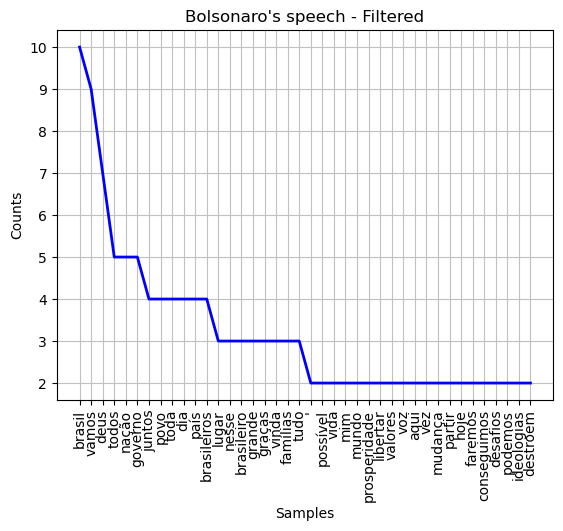

In [680]:

#Bolsonaro
with open('Bolsonaro.txt') as text2:
    words2 = word_tokenize(text2.read(),  language='Portuguese', preserve_line = False)
    
    lower_words2 = (map(lambda x: x.lower(), words2))
    
#removing stopwords
filtered_words2 = []
for w in lower_words2: 
    if w not in stop_words:
        filtered_words2.append(w)
        
#removing other items
for item in filtered_words2:
    if item == " ": filtered_words2.remove(item)
    if item == ",": filtered_words2.remove(item)
    if item == ".": filtered_words2.remove(item)
    if item == "E": filtered_words2.remove(item)

#Frequency
fdist2 = FreqDist(words2)
fdist2_filtered = FreqDist(filtered_words2)

#Lenght and the 10 most common words
print("Bolsonaro's speech: "
        +'\n' + 'Raw: '+ str(fdist1)
        +'\n' + 'Filtered: ' + str(fdist1_filtered)
        +'\n' + 'Most common words: ' + str(fdist2_filtered.most_common(15))
     )

#Filtered Speech
fdist2_filtered.plot(40, cumulative=False, c = 'Blue', title = "Bolsonaro's speech - Filtered")
plt.show()

In [720]:
#top 15 lists
Name= ['Lula', 'Lula', 'Lula', 'Lula', 'Lula', 'Lula', 'Lula', 'Lula', 'Lula', 'Lula','Lula', 'Lula', 'Lula', 'Lula', 'Lula',
            'Bolsonaro', 'Bolsonaro', 'Bolsonaro', 'Bolsonaro', 'Bolsonaro', 'Bolsonaro', 'Bolsonaro', 'Bolsonaro', 'Bolsonaro', 'Bolsonaro', 'Bolsonaro', 'Bolsonaro', 'Bolsonaro', 'Bolsonaro', 'Bolsonaro']
print(len(Name))

Words = ['país', 'todos', 'Brasil', 'povo', 'desigualdade', 'brasileiro', 'anos', 'cada', 'tempo', 'brasileiros', 'fome', 'brasileiras', 'deste', 'todas', 'governo',
             'Brasil', 'vamos', 'Deus', 'todos', 'nação', 'governo', 'juntos', 'povo', 'toda', 'dia', 'país', 'brasileiros', 'lugar', 'nesse', 'brasileiro']
print(len(Words))

Count = [30, 22, 22, 20, 18, 15, 13, 11, 10, 10,10, 9, 8, 8, 8,
             10, 7, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3]
print(len(Count))

Classification = ['country', 'people', 'country', 'people', 'social', 'people', 'other', 'other', 'other', 'people', 'social', 'people', 'other', 'other', 'government', 
                'country', 'people', 'religion', 'other', 'country', 'government', 'people', 'people','other', 'other', 'country', 'people',  'other', 'other', 'people']

print(len(Classification))

30
30
30
30


In [722]:
#Creating a dataframe of the 15 most common words for each president
import numpy as np

#creating dataframe for analysis
top_15 = {
    'Name': Name,
    'Words': Words,
    'Count': Count,
    'Classification': Classification
}

top_15_data = pd.DataFrame(top_15)

#Adding new column - To calculate the lenght of each word

top_15_data['Lenght'] =  top_15_data['Words'].str.len()

#Displaying the table

print("Top 15 words for each president in their inauguration's speech \n")
print(top_15_data)

Top 15 words for each president in their inauguration's speech 

         Name         Words  Count Classification  Lenght
0        Lula          país     30        country       4
1        Lula         todos     22         people       5
2        Lula        Brasil     22        country       6
3        Lula          povo     20         people       4
4        Lula  desigualdade     18         social      12
5        Lula    brasileiro     15         people      10
6        Lula          anos     13          other       4
7        Lula          cada     11          other       4
8        Lula         tempo     10          other       5
9        Lula   brasileiros     10         people      11
10       Lula          fome     10         social       4
11       Lula   brasileiras      9         people      11
12       Lula         deste      8          other       5
13       Lula         todas      8          other       5
14       Lula       governo      8     government       7
15  Bol

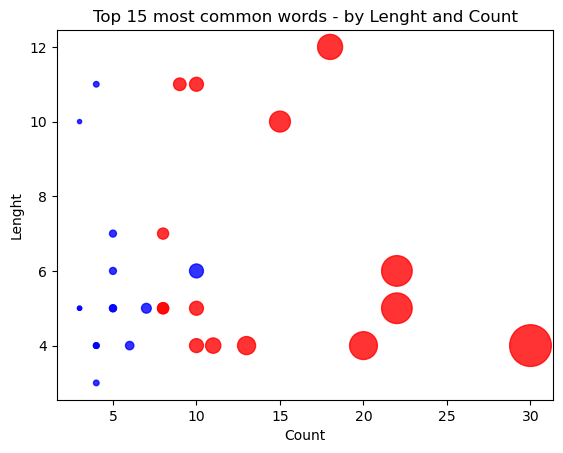

Lula has a tendency of using longer words with more frequency than Bolsonaro. 
 
His biggest word contains 12 characters and Bolsonaro has 11.
The difference is 1 characters long.

In terms of repetitions, Lula says one word maximum 30 times, while Bolsonaro has a maximum value of 10. Let's go a bit deeper in the analysis and see how many words per lenght each of them uses.


In [740]:
#graph

    #Top 15 most common words - by Lengh and Count

top_15_data['Count_axis'] = top_15_data['Count']**2

colors = {'Lula':'Red', 'Bolsonaro':"Blue"}

scatter = top_15_data.plot.scatter(x='Count', y='Lenght', 
                         alpha =0.8,
                         c = top_15_data['Name'].map(colors), 
                         s = top_15_data['Count_axis'],
                         title = 'Top 15 most common words - by Lenght and Count'
                        )
plt.show()

#creating some calculations for lula and bolsonaro data

lula_data = (top_15_data[top_15_data['Name'] == 'Lula'])

lula_max_lenght = (lula_data['Lenght'].max())

lula_max_count = (lula_data['Count'].max())

lula_total_count = lula_data['Count'].sum()

bolsonaro_data = (top_15_data[top_15_data['Name'] == 'Bolsonaro'])

bolsonaro_max_lenght = (bolsonaro_data['Lenght'].max())

bolsonaro_max_count = (bolsonaro_data['Count'].max())

bolsonaro_total_count = bolsonaro_data['Count'].sum()

#diff
diff_word_lenght = lula_max_lenght - bolsonaro_max_lenght

#analysis

print("Lula has a tendency of using longer words with more frequency than Bolsonaro. \n \nHis biggest word contains " 
      + str(lula_max_lenght) + " characters and Bolsonaro has " + str(bolsonaro_max_lenght) 
     + ".\nThe difference is "+ str(diff_word_lenght)+ " characters long.\n\n"+
"In terms of repetitions, Lula says one word maximum " + str(lula_max_count) + " times, while Bolsonaro has a maximum value of "
     + str(bolsonaro_max_count)+". Let's go a bit deeper in the analysis and see how many words per lenght each of them uses.")


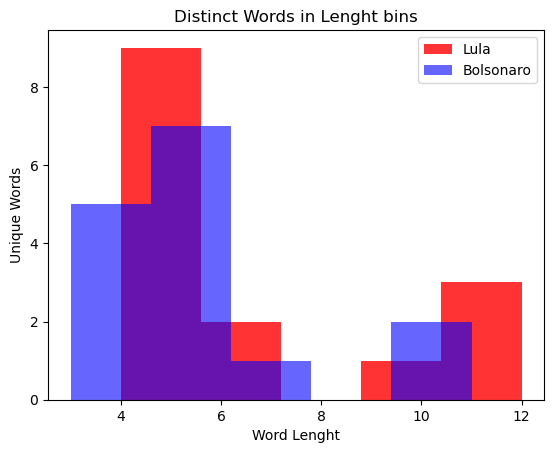

Looking at the unique words in lenght groups, we see that Lula tends to use more distinct shorter words, while also using the longest words in this dataset.
Bolsonaro's most repeated words are also short, maximum 11 in lenght.


In [741]:
#histogram

plt.hist(lula_data['Lenght'],alpha = 0.8, bins = 5, label = 'Lula', color = colors['Lula'])

plt.hist(bolsonaro_data['Lenght'], alpha = 0.6, bins = 5, label = 'Bolsonaro', color = colors['Bolsonaro'])

#Labels
plt.xlabel('Word Lenght')
plt.ylabel('Unique Words')
plt.title('Distinct Words in Lenght bins')
plt.legend()
plt.show()

#Analysis
print("Looking at the unique words in lenght groups, we see that Lula tends to use more distinct shorter words, while also using the longest words in this dataset."+
      "\nBolsonaro's most repeated words are also short, maximum 11 in lenght.")



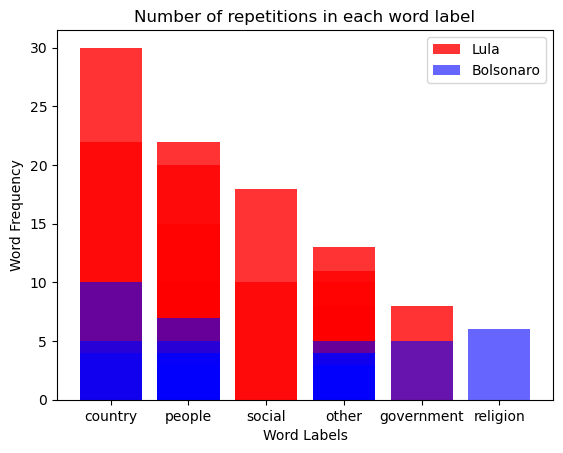

I labeled all the top 15 words to get an idea of what their speeches were mostly focused on.

Country, people and government related topics are common on both, which is expected at a inauguration speech.
Lula focused in talking about the social problems, the word 'inequality' appeared 18 times and 'hunger' 10 in his speech.
Meanwhile, Bolsonaro's speech focused in religion (God shows 6 times).


In [747]:
 #Lula's words classification by Count


plt.bar(lula_data['Classification'], height = lula_data['Count'], alpha = 0.8,label = 'Lula', color = colors['Lula'])

plt.bar(bolsonaro_data['Classification'],height = bolsonaro_data['Count'], alpha = 0.6, label = 'Bolsonaro', color = colors['Bolsonaro'])

plt.title('Number of repetitions in each word label')
plt.xlabel('Word Labels')
plt.ylabel('Word Frequency')
plt.legend()
plt.show()

#analysis
print("I labeled all the top 15 words to get an idea of what their speeches were mostly focused on."+
      "\n\nCountry, people and government related topics are common on both, which is expected at a inauguration speech."+
      "\nLula focused in talking about the social problems, the word 'inequality' appeared 18 times and 'hunger' 10 in his speech."
     +"\nMeanwhile, Bolsonaro's speech focused in religion (God shows 6 times).")


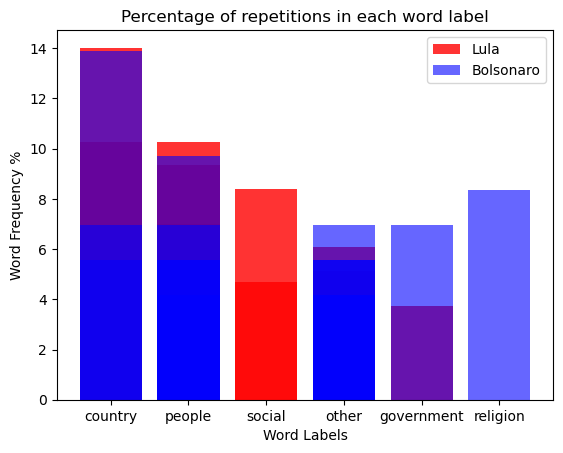

To ensure a fair comparison, since Lula's speech was much longer than Bolsonaro's, I calculated the label proportion in the top 15 words frequency.
Bolsonaro labels proportions are very much alligned to his nationalist ideals. 'God' is mentioned multiple times throughout his speech, Lula doesn't have 'God' in the most frequent words.

Lula's unique category is 'social'. Bolsonaro doesn't mention any social problems in his top 10 words.


In [749]:
#Repetitions in %
plt.bar(lula_data['Classification'], height = (lula_data['Count']/lula_total_count)*100, alpha = 0.8,label = 'Lula', color = colors['Lula'])

plt.bar(bolsonaro_data['Classification'],height = (bolsonaro_data['Count']/bolsonaro_total_count)*100, alpha = 0.6, label = 'Bolsonaro', color = colors['Bolsonaro'])

plt.title('Percentage of repetitions in each word label')
plt.xlabel('Word Labels')
plt.ylabel('Word Frequency %')
plt.legend()

plt.show()


print("To ensure a fair comparison, since Lula's speech was much longer than Bolsonaro's, I calculated the label proportion in the top 15 words frequency."+
    "\nBolsonaro labels proportions are very much alligned to his nationalist ideals.+
      "\nThe Government and Religion percentage is quite high, along "+
      'God' is mentioned multiple times throughout his speech, Lula doesn't have 'God' in the most frequent words.\n"
     +"\nLula's unique category is 'social'. Bolsonaro doesn't mention any social problems in his top 10 words.")
